In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def plot_loss(history):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color='blue',label='loss')
  plt.semilogy(history.epoch, history.history['val_loss'],
               color='red',label='val_loss')

  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


# LeNet

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6,(5,5),activation="relu",input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(10,(5,5),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(120,activation='relu'),
    tf.keras.layers.Dense(84,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["Accuracy"]
)

# model.summary()

history = model.fit(x_train,y_train,validation_split=0.1,epochs=20, batch_size=100)

Epoch 1/20
540/540 [==============================] - 10s 10ms/step - loss: 0.7887 - Accuracy: 0.7035 - val_loss: 0.5053 - val_Accuracy: 0.8052
Epoch 2/20
540/540 [==============================] - 3s 5ms/step - loss: 0.5290 - Accuracy: 0.8034 - val_loss: 0.4242 - val_Accuracy: 0.8452
Epoch 3/20
540/540 [==============================] - 3s 5ms/step - loss: 0.4658 - Accuracy: 0.8279 - val_loss: 0.3966 - val_Accuracy: 0.8532
Epoch 4/20
540/540 [==============================] - 3s 5ms/step - loss: 0.4311 - Accuracy: 0.8419 - val_loss: 0.3749 - val_Accuracy: 0.8597
Epoch 5/20
540/540 [==============================] - 3s 6ms/step - loss: 0.4069 - Accuracy: 0.8488 - val_loss: 0.3550 - val_Accuracy: 0.8703
Epoch 6/20
540/540 [==============================] - 3s 5ms/step - loss: 0.3889 - Accuracy: 0.8562 - val_loss: 0.3649 - val_Accuracy: 0.8592
Epoch 7/20
540/540 [==============================] - 3s 6ms/step - loss: 0.3815 - Accuracy: 0.8578 - val_loss: 0.3350 - val_Accuracy: 0.8752
Epoc

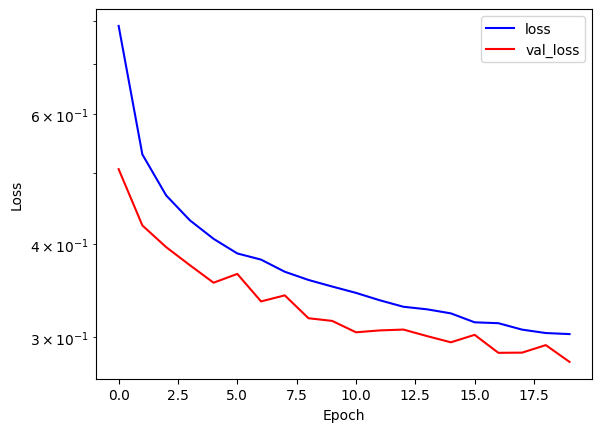

In [5]:
plot_loss(history)

In [6]:
model.evaluate(x_test,y_test, batch_size=1)

10000/10000 [==============================] - 52s 5ms/step - loss: 0.2907 - Accuracy: 0.8947


[0.29067474603652954, 0.8946999907493591]

# VGG

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(1,1),activation="relu",input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(112,(2,2),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(256,(2,2),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(512,(2,2),activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(120,activation='relu'),
    tf.keras.layers.Dense(84,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["Accuracy"]
)

# model.summary()

history = model.fit(x_train,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.6913 - Accuracy: 0.7401 - val_loss: 0.5011 - val_Accuracy: 0.8128
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4828 - Accuracy: 0.8194 - val_loss: 0.4858 - val_Accuracy: 0.8235
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4361 - Accuracy: 0.8359 - val_loss: 0.4220 - val_Accuracy: 0.8411
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4049 - Accuracy: 0.8478 - val_loss: 0.4045 - val_Accuracy: 0.8478
Epoch 5/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3817 - Accuracy: 0.8555 - val_loss: 0.3915 - val_Accuracy: 0.8534
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3646 - Accuracy: 0.8616 - val_loss: 0.4066 - val_Accuracy: 0.8502
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3419 - Accuracy: 0.8713 - val_loss: 0.3774 - val

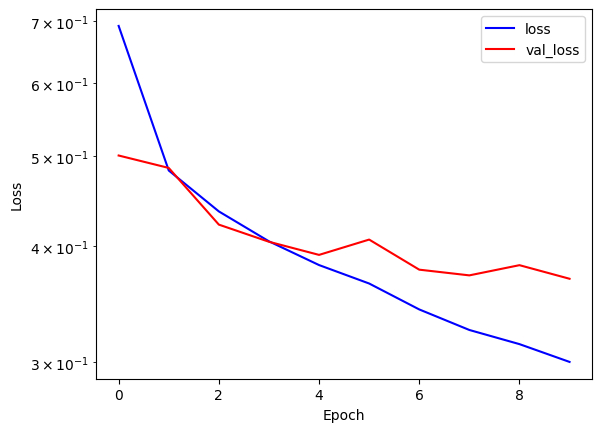

In [8]:
plot_loss(history)

In [9]:
model.evaluate(x_test,y_test, batch_size=1)

10000/10000 [==============================] - 51s 5ms/step - loss: 0.3906 - Accuracy: 0.8614


[0.3906239867210388, 0.8614000082015991]